In [141]:
import sys

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [142]:
df = pd.read_csv('./source/heart.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Preprocess

In [143]:
df.isnull().sum() * 100 / len(df)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [144]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Age,0.0
Sex,0.0
ChestPainType,0.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,0.0
MaxHR,0.0
ExerciseAngina,0.0
Oldpeak,0.0


In [145]:
### Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope -> OneHotEncoding ###
df_onehot = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [146]:
df_onehot

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


<AxesSubplot:>

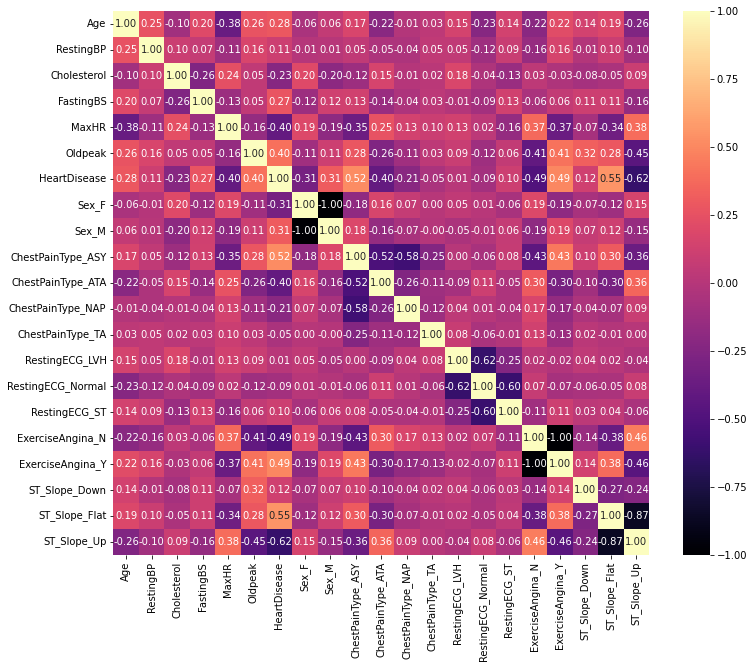

In [147]:
## Correlation Matrix with Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_onehot.corr(),annot=True,cmap="magma",fmt='.2f')
### Target Featrue : HeartDisease

# Split Target Featrue 

In [148]:
X = df_onehot.drop(['HeartDisease'], axis=1)
Y = df_onehot['HeartDisease']

In [149]:
## Draw Matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be appied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Prediction
## 1) Randomforest

In [150]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[104  22]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.88      0.87       150

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [151]:
## StandardScaler ## 표준화 작업
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[105  21]
 [ 16 134]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       126
           1       0.86      0.89      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



## 2) SVM (Support Vector Machines)

In [152]:
from sklearn import svm

trainedsvm = svm.SVC(kernel='linear', C=1)
trainedsvm.fit(X_Train,Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm))

[[100  26]
 [ 19 131]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       126
           1       0.83      0.87      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276

0.8369565217391305


In [153]:
trainedsvm = svm.SVC(kernel='linear', C=10)
trainedsvm.fit(X_Train,Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm))

[[100  26]
 [ 20 130]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.83      0.87      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

0.8333333333333334


In [154]:
trainedsvm = svm.SVC(kernel='linear', C=100)
trainedsvm.fit(X_Train,Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm))

[[100  26]
 [ 20 130]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.83      0.87      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

0.8333333333333334


In [155]:
trainedsvm = svm.SVC(kernel='rbf', C=1)
trainedsvm.fit(X_Train,Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm))

[[102  24]
 [ 17 133]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       126
           1       0.85      0.89      0.87       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276

0.8514492753623188


In [156]:
trainedsvm = svm.SVC(kernel='rbf', C=10)
trainedsvm.fit(X_Train,Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm))

[[107  19]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       126
           1       0.87      0.84      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276

0.8442028985507246


In [157]:
trainedsvm = svm.SVC(kernel='rbf', C=100)
trainedsvm.fit(X_Train,Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm))

[[107  19]
 [ 29 121]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       126
           1       0.86      0.81      0.83       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

0.8260869565217391


## 3) Grid Search CV

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       126
           1       0.86      0.81      0.83       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

0.8260869565217391 

Confusion matrix, without normalization
[[107  19]
 [ 29 121]]


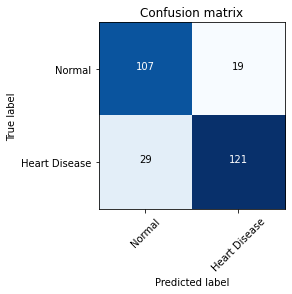

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf']
              }

trainedgs = GridSearchCV(svm.SVC(), param_grid=params, cv=2)
trainedgs.fit(X_Train, Y_Train)
predictiongs = trainedgs.predict(X_Test)
print(classification_report(Y_Test,predictionsvm))
print(accuracy_score(Y_Test,predictionsvm),'\n')

## Draw Matrix
cm = metrics.confusion_matrix(Y_Test, predictionsvm) 

plot_confusion_matrix(cm, ['Normal','Heart Disease'],normalize=False)

## 4) K-Nearest Neighbor

In [159]:
from sklearn.neighbors import KNeighborsClassifier

trainedknn = KNeighborsClassifier(n_neighbors = 3)
trainedknn.fit(X_Train,Y_Train)
predictionknn = trainedknn.predict(X_Test)
print(confusion_matrix(Y_Test,predictionknn))
print(classification_report(Y_Test,predictionknn))
print(accuracy_score(Y_Test,predictionknn))

[[104  22]
 [ 20 130]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       126
           1       0.86      0.87      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276

0.8478260869565217


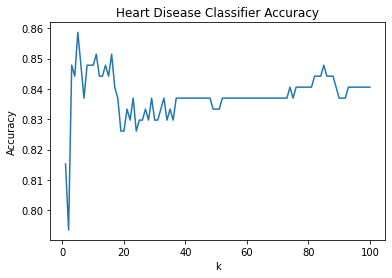

In [160]:
## Draw graph changing the value of k 1~100
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []
for k in k_list:
    tknn = KNeighborsClassifier(n_neighbors = k)
    tknn.fit(X_Train,Y_Train)
    accuracies.append(tknn.score(X_Test, Y_Test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Heart Disease Classifier Accuracy")
plt.show()

## 5) Feature Selection

In [161]:
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func=f_regression, k=5)
X_Train_selected = selector.fit_transform(X_Train, Y_Train)
X_Test_selected = selector.transform(X_Test)

X_Train_selected.shape, X_Test_selected.shape

((642, 5), (276, 5))

In [162]:
from numpy import array

df_n = df_onehot.drop(['HeartDisease'], axis=1)
all_names = df_n.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]

## High correlation with target variable columns
print(selected_names)

Index(['ChestPainType_ASY', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [163]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train_selected,Y_Train)
predictionforest = trainedforest.predict(X_Test_selected)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
print(accuracy_score(Y_Test,predictionknn))

[[ 98  28]
 [ 22 128]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       126
           1       0.82      0.85      0.84       150

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

0.8478260869565217


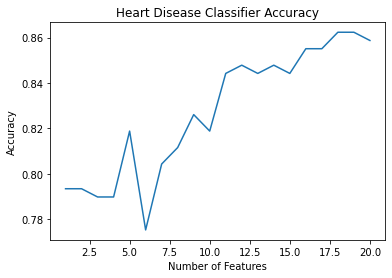

In [164]:
k_list = range(1,21)
accuracies = []
for a in k_list:
    selector = SelectKBest(score_func=f_regression, k=a)
    X_Train_selected = selector.fit_transform(X_Train, Y_Train)
    X_Test_selected = selector.transform(X_Test)
    
    tforest = RandomForestClassifier(n_estimators=700).fit(X_Train_selected,Y_Train)
    accuracies.append(tforest.score(X_Test_selected, Y_Test))
plt.plot(k_list, accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Heart Disease Classifier Accuracy")
plt.show()

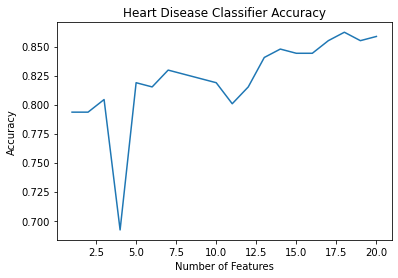

In [165]:
k_list = range(1,21)
accuracies = []
for a in k_list:
    selector = SelectKBest(score_func=f_regression, k=a)
    X_Train_selected = selector.fit_transform(X_Train, Y_Train)
    X_Test_selected = selector.transform(X_Test)
    
    tknn = KNeighborsClassifier(n_neighbors = 5).fit(X_Train_selected,Y_Train)
    accuracies.append(tknn.score(X_Test_selected, Y_Test))
plt.plot(k_list, accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Heart Disease Classifier Accuracy")
plt.show()

## 6) PCA (Principal Component Analysis)

In [166]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df.head()

,PC1,PC2
0,3.094175,-1.397188
1,1.517651,1.788764
2,1.931341,-0.801324
3,-1.369377,1.589866
4,1.713363,-1.182282


In [167]:
PCA_df = pd.concat([PCA_df, df['HeartDisease']], axis = 1)
PCA_df['HeartDisease'] = LabelEncoder().fit_transform(PCA_df['HeartDisease'])

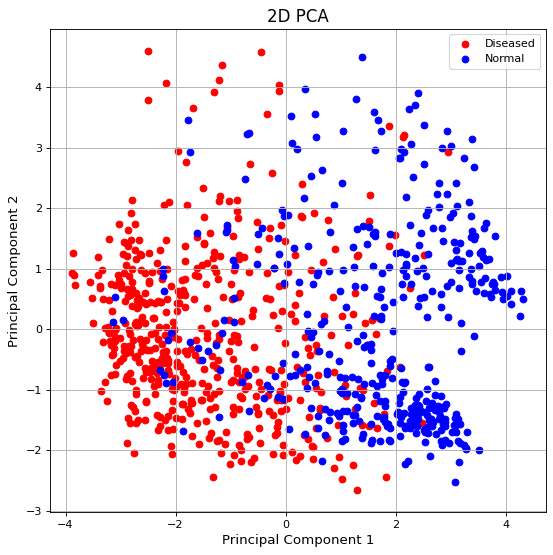

In [168]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['HeartDisease'] == clas, 'PC1'], PCA_df.loc[PCA_df['HeartDisease'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Diseased', 'Normal'])
plt.grid()